In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

import statsmodels.api as sm
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('tech.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
1,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.424,4,0.2,68.3568
2,20,CA-2014-143336,2014-08-27,2014-09-01,Second Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,San Francisco,...,94109,West,TEC-PH-10001949,Technology,Phones,Cisco SPA 501G IP Phone,213.480,3,0.2,16.0110
3,27,CA-2016-121755,2016-01-16,2016-01-20,Second Class,EH-13945,Eric Hoffmann,Consumer,United States,Los Angeles,...,90049,West,TEC-AC-10003027,Technology,Accessories,Imation 8GB Mini TravelDrive USB 2.0 Flash Drive,90.570,3,0.0,11.7741
4,36,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737


In [4]:
tech = df[['Order Date','Quantity']]

In [5]:
tech.head()

,Order Date,Quantity
0,2014-06-09,6
1,2014-06-09,4
2,2014-08-27,3
3,2016-01-16,3
4,2016-12-08,7


In [6]:
tech.dtypes
tech['Order Date'] = pd.to_datetime(tech['Order Date'], format='mixed')

In [7]:
tech.sort_values("Order Date")
tech.isnull().sum()

Order Date    0
Quantity      0
dtype: int64

In [8]:
tech = tech.groupby('Order Date')['Quantity'].sum().reset_index()

In [9]:
tech = tech.set_index('Order Date')
tech.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

In [10]:
y = tech['Quantity'].resample('MS').mean()

<Axes: xlabel='Order Date'>

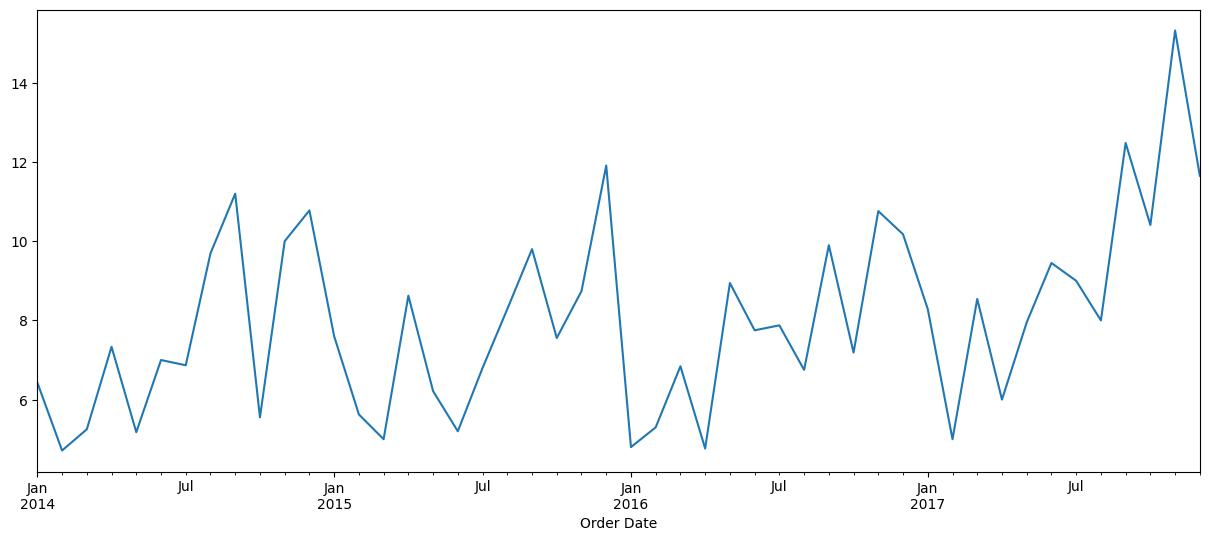

In [11]:
y.plot(figsize=(15,6))

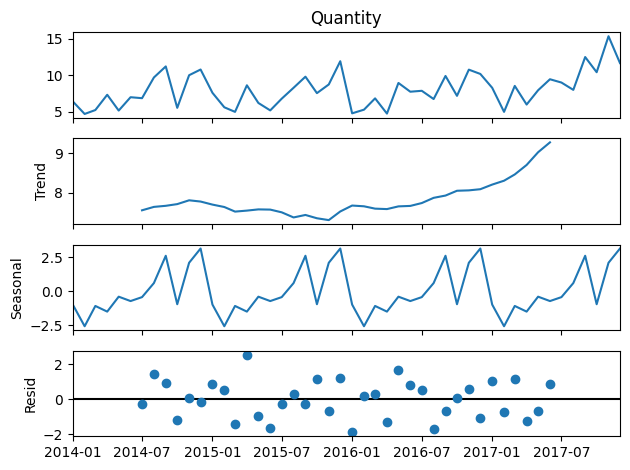

In [12]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()
plt.show()

In [13]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Few parameter combinations are:')
print('{} x {} '.format(pdq[1], seasonal_pdq[1]))
print('{} x {} '.format(pdq[2], seasonal_pdq[2]))

Few parameter combinations are:
(0, 0, 1) x (0, 0, 1, 12) 
(0, 1, 0) x (0, 1, 0, 12) 


In [14]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal, enforce_stationary=False, enforce_invertibility= False)
            results = model.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:341.95677118309015
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:2137.2992674411926
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:151.3206628546231
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:152.23127074562376
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:239.14367809966723
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1450.6570464294387
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:152.30552580668396
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:154.18791740709267
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:303.0827628975237
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1650.912357967033
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:153.26639946573158
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:154.0680510918846
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:238.28638644650454
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1240.7564222367578
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:154.16560778748246
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:155.99415721699458
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:229.29581548169267
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1978.1303655114632
ARIMA(0, 1, 0)x(0, 1, 0, 12) - A

In [15]:
train_data = y['2014-01-01':'2017-05-01']

In [16]:
model = sm.tsa.statespace.SARIMAX(train_data, order=(1,1,1),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3780      0.234     -1.612      0.107      -0.838       0.082
ma.L1         -1.0000   7115.901     -0.000      1.000   -1.39e+04    1.39e+04
ar.S.L12      -0.5773      0.311     -1.854      0.064      -1.188       0.033
sigma2         2.8409   2.02e+04      0.000      1.000   -3.96e+04    3.96e+04


In [17]:
predictions = results.predict()

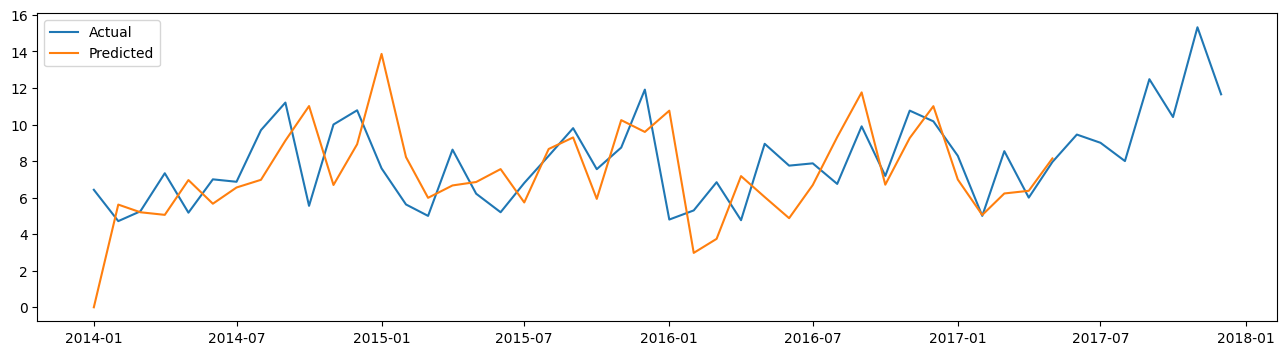

In [18]:
plt.figure(figsize=(16,4))
plt.plot(y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()

In [19]:
next_5 = results.forecast(steps = 5)

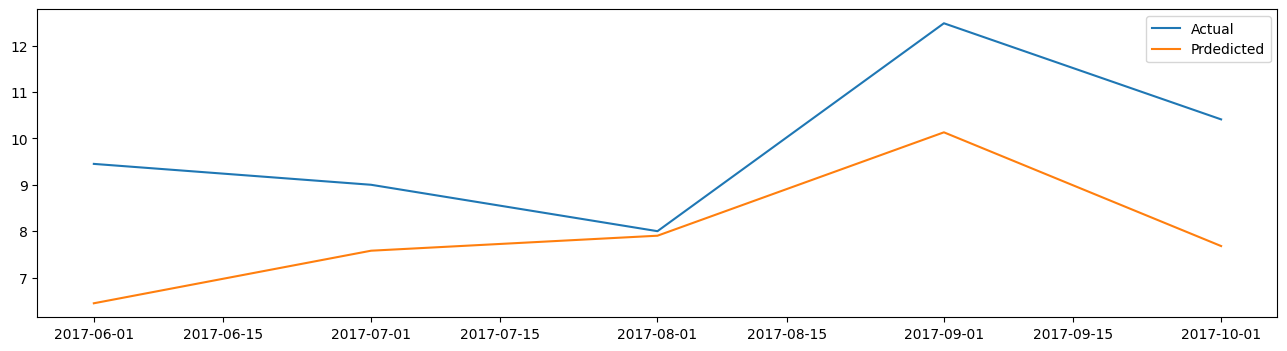

In [20]:
plt.figure(figsize=(16,4))
plt.plot(y['2017-06-01':'2017-10-01'],label='Actual')
plt.plot(next_5, label="Prdedicted")
plt.legend()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [26]:
rmse = sqrt(mean_squared_error(train_data, predictions))
mae = mean_absolute_error(train_data, predictions)

In [27]:
rmse1 = sqrt(mean_squared_error(y['2017-06-01':'2017-10-01'], next_5))
mae1 = mean_absolute_error(y['2017-06-01':'2017-10-01'], next_5)

In [28]:
print('RMSE: ',rmse)
print('RMSE: ',rmse1)
print('MAE: ',mae)
print('MAR1: ',mae1)

RMSE:  2.574182514356683
RMSE:  2.1918852218447245
MAE:  2.0225382607772437
MAR1:  1.9202896845287298


In [29]:
next_5

2017-06-01     6.446345
2017-07-01     7.579114
2017-08-01     7.902320
2017-09-01    10.130288
2017-10-01     7.679575
Freq: MS, Name: predicted_mean, dtype: float64

In [30]:
y['2017-06-01':'2017-10-01']

Order Date
2017-06-01     9.450000
2017-07-01     9.000000
2017-08-01     8.000000
2017-09-01    12.480000
2017-10-01    10.409091
Freq: MS, Name: Quantity, dtype: float64

In [31]:
import pickle
filename = 'demand_tech.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully as", filename)

Model saved successfully as demand_tech.pkl
